<img src="pandas_logo.svg" alt="NumPy Logo" style="width:250px; height:100px;">
<h1>GroupBy, Plotting and  Cut() Function</h1>

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h4>Pandas GroupBy:</h4>

In [191]:
df = pd.DataFrame(
    {
        "Countries":["Afghanistan", "South Africa", "France", "Argentina", "America", "India", "Egypt", "England", "Brazil", "Canada"],
        "Continents":["Asia", "Africa", "Europe", "South America", "North America", "Asia", "Africa", "Europe", "South America", "North America"],
        "Beer":np.random.randint(150, 250, size=10),
        "Spirit":np.random.randint(150, 250, size=10),
        "Wine":np.random.randint(150, 250, size=10)
    }
)
df["T_Cons"] = df["Beer"] + df["Spirit"] + df["Wine"]
df

,Countries,Continents,Beer,Spirit,Wine,T_Cons
0,Afghanistan,Asia,231,215,191,637
1,South Africa,Africa,227,183,212,622
2,France,Europe,197,236,243,676
3,Argentina,South America,197,175,227,599
4,America,North America,220,216,216,652
5,India,Asia,241,223,178,642
6,Egypt,Africa,173,244,241,658
7,England,Europe,189,162,162,513
8,Brazil,South America,198,173,239,610
9,Canada,North America,166,194,188,548


In [193]:
df.Beer.mean()

203.9

In [195]:
df["Beer"].mean()

203.9

In [197]:
df[["Beer"]].mean()

Beer    203.9
dtype: float64

In [199]:
df[["Beer", "Spirit"]].mean()

Beer      203.9
Spirit    202.1
dtype: float64

In [201]:
df[df.Continents == "Africa"]

,Countries,Continents,Beer,Spirit,Wine,T_Cons
1,South Africa,Africa,227,183,212,622
6,Egypt,Africa,173,244,241,658


In [203]:
df[df["Continents"] == "Africa"]

,Countries,Continents,Beer,Spirit,Wine,T_Cons
1,South Africa,Africa,227,183,212,622
6,Egypt,Africa,173,244,241,658


In [205]:
df[df["Continents"] == "Africa"].min()

Countries      Egypt
Continents    Africa
Beer             173
Spirit           183
Wine             212
T_Cons           622
dtype: object

In [207]:
df[df["Continents"] == "Africa"].Beer.min()

173

In [209]:
df[df["Continents"] == "Africa"]["Beer"].min()

173

In [211]:
df[df["Continents"] == "Africa"][["Beer", "Spirit"]].min()

Beer      173
Spirit    183
dtype: int32

In [213]:
df[["Continents"]] == ["Africa"]

,Continents
0,False
1,True
2,False
3,False
4,False
5,False
6,True
7,False
8,False
9,False


In [215]:
df.groupby("Continents")

In [217]:
gb = df.groupby("Continents")
gb

In [219]:
for i, j in gb:
    print(i)
    print(j)
    print()

Africa
      Countries Continents  Beer  Spirit  Wine  T_Cons
1  South Africa     Africa   227     183   212     622
6         Egypt     Africa   173     244   241     658

Asia
     Countries Continents  Beer  Spirit  Wine  T_Cons
0  Afghanistan       Asia   231     215   191     637
5        India       Asia   241     223   178     642

Europe
  Countries Continents  Beer  Spirit  Wine  T_Cons
2    France     Europe   197     236   243     676
7   England     Europe   189     162   162     513

North America
  Countries     Continents  Beer  Spirit  Wine  T_Cons
4   America  North America   220     216   216     652
9    Canada  North America   166     194   188     548

South America
   Countries     Continents  Beer  Spirit  Wine  T_Cons
3  Argentina  South America   197     175   227     599
8     Brazil  South America   198     173   239     610



In [221]:
gb.get_group("Africa")

,Countries,Continents,Beer,Spirit,Wine,T_Cons
1,South Africa,Africa,227,183,212,622
6,Egypt,Africa,173,244,241,658


In [223]:
gb.min()

,Countries,Beer,Spirit,Wine,T_Cons
Continents,,,,,
Africa,Egypt,173,183,212,622
Asia,Afghanistan,231,215,178,637
Europe,England,189,162,162,513
North America,America,166,194,188,548
South America,Argentina,197,173,227,599


In [225]:
df.groupby("Continents").min()

,Countries,Beer,Spirit,Wine,T_Cons
Continents,,,,,
Africa,Egypt,173,183,212,622
Asia,Afghanistan,231,215,178,637
Europe,England,189,162,162,513
North America,America,166,194,188,548
South America,Argentina,197,173,227,599


In [227]:
gb.Beer.min()

Continents
Africa           173
Asia             231
Europe           189
North America    166
South America    197
Name: Beer, dtype: int32

In [229]:
df.groupby("Continents").Beer.min()

Continents
Africa           173
Asia             231
Europe           189
North America    166
South America    197
Name: Beer, dtype: int32

In [231]:
gb["Beer"].min()

Continents
Africa           173
Asia             231
Europe           189
North America    166
South America    197
Name: Beer, dtype: int32

In [233]:
df.groupby("Continents")[["Beer"]].min()

,Beer
Continents,
Africa,173
Asia,231
Europe,189
North America,166
South America,197


In [235]:
gb[["Beer", "Spirit"]].min()

,Beer,Spirit
Continents,,
Africa,173,183
Asia,231,215
Europe,189,162
North America,166,194
South America,197,173


In [237]:
df.groupby("Continents")[["Beer", "Spirit"]].min()

,Beer,Spirit
Continents,,
Africa,173,183
Asia,231,215
Europe,189,162
North America,166,194
South America,197,173


In [239]:
gb.Beer.agg(["min", "max", "sum", "count"])

,min,max,sum,count
Continents,,,,
Africa,173,227,400,2
Asia,231,241,472,2
Europe,189,197,386,2
North America,166,220,386,2
South America,197,198,395,2


In [241]:
gb.agg(
    {
        "Beer":["min", "max", "sum", "count"],
        "Spirit":["min", "max", "sum", "count"],
        "Wine":["min", "max", "sum", "count"]
    }
)

Beer                 Spirit                 Wine                
               min  max  sum count    min  max  sum count  min  max  sum count
Continents                                                                    
Africa         173  227  400     2    183  244  427     2  212  241  453     2
Asia           231  241  472     2    215  223  438     2  178  191  369     2
Europe         189  197  386     2    162  236  398     2  162  243  405     2
North America  166  220  386     2    194  216  410     2  188  216  404     2
South America  197  198  395     2    173  175  348     2  227  239  466     2

In [243]:
gb[["Beer", "Spirit"]].agg(["min", "max", "sum", "count"])

Beer                 Spirit                
               min  max  sum count    min  max  sum count
Continents                                               
Africa         173  227  400     2    183  244  427     2
Asia           231  241  472     2    215  223  438     2
Europe         189  197  386     2    162  236  398     2
North America  166  220  386     2    194  216  410     2
South America  197  198  395     2    173  175  348     2

In [245]:
df.groupby(["Continents", "Countries"])[["Beer"]].min()

Beer
Continents    Countries         
Africa        Egypt          173
              South Africa   227
Asia          Afghanistan    231
              India          241
Europe        England        189
              France         197
North America America        220
              Canada         166
South America Argentina      197
              Brazil         198

In [247]:
df.groupby(["Continents", "Countries"], as_index=False)[["Beer"]].min()

,Continents,Countries,Beer
0,Africa,Egypt,173
1,Africa,South Africa,227
2,Asia,Afghanistan,231
3,Asia,India,241
4,Europe,England,189
5,Europe,France,197
6,North America,America,220
7,North America,Canada,166
8,South America,Argentina,197
9,South America,Brazil,198


<h4>Pandas plotting:</h4>

In [250]:
%matplotlib inline

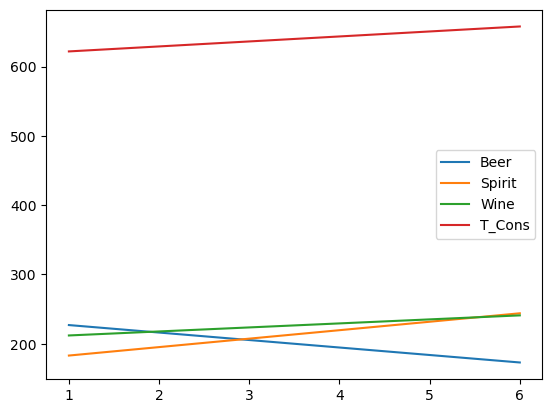

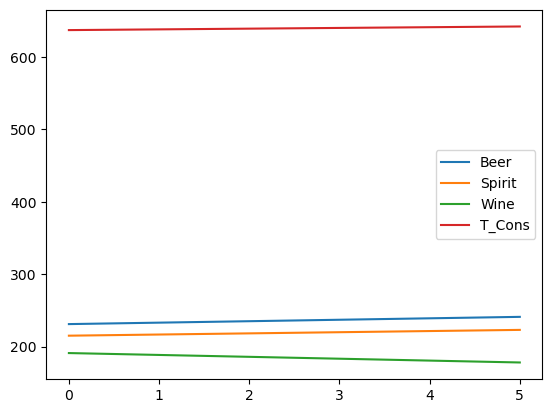

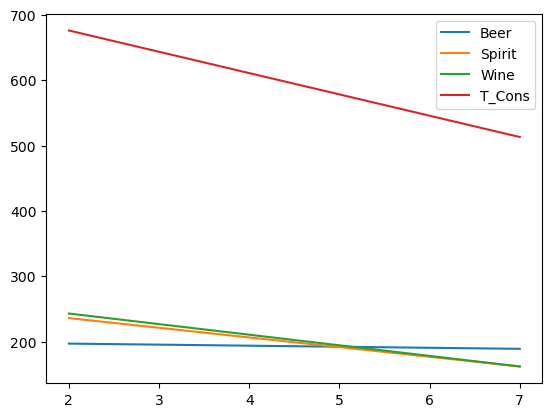

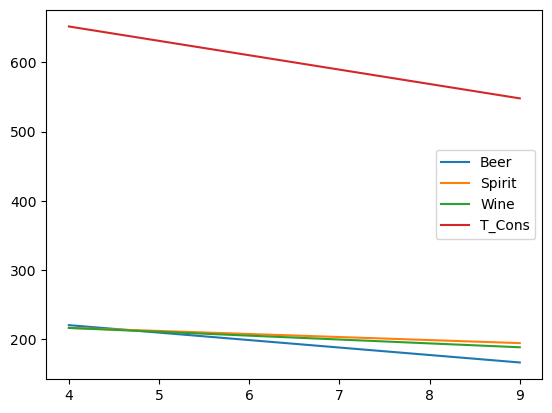

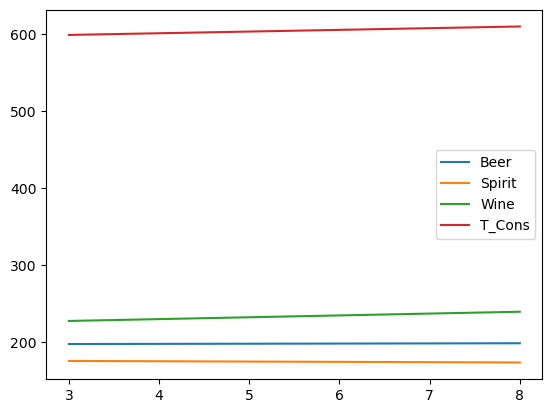

In [252]:
gb.plot()
plt.show()

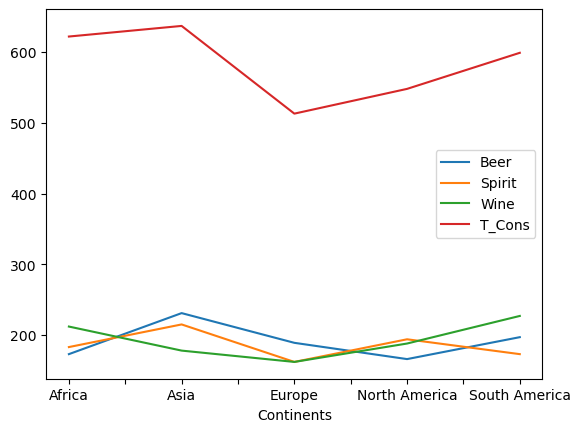

In [253]:
gb.min().plot()
plt.show()

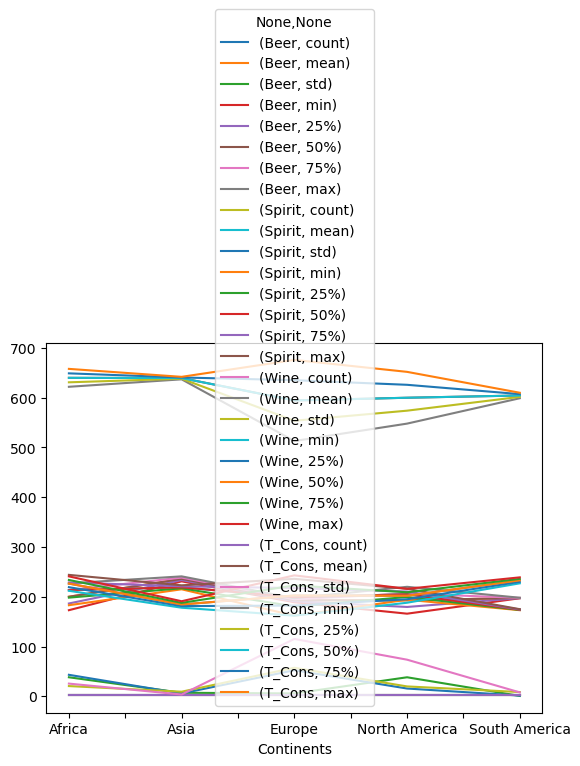

In [255]:
gb.describe().plot()
plt.show()

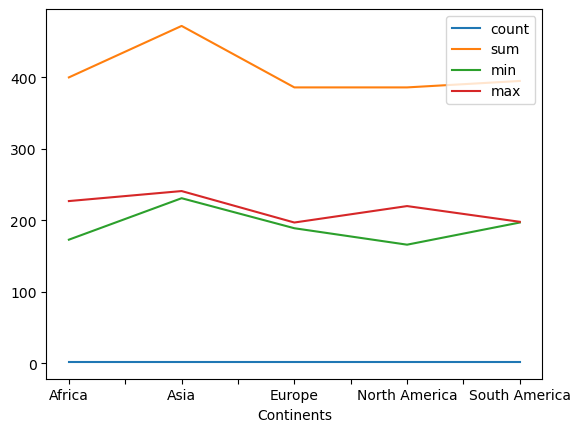

In [257]:
gb.Beer.agg(["count", "sum", "min", "max"]).plot()
plt.show()

<h4>Pandas cut function:</h4>

In [260]:
df1 = pd.DataFrame(
    {
        "Names":["Afghanistan", "South Africa", "France", "Argentina", "America", "India", "Egypt", "England", "Brazil", "Canada"],
        "Marks":np.random.randint(0, 100, size=10)
    }
)
df1

,Names,Marks
0,Afghanistan,28
1,South Africa,98
2,France,63
3,Argentina,31
4,America,81
5,India,70
6,Egypt,78
7,England,49
8,Brazil,22
9,Canada,60


<h5>0 to 39 = "Fail"</h5>
<h5>40 to 59 = "Pass"</h5>
<h5>60 to 69 = "First Class"</h5>
<h5>70 to 89 = "Distinction"</h5>
<h5>90 to 100 = "Extraordinary"</h5>

In [264]:
bins = [0, 39, 59, 69, 89, 100]
labels=["Fail", "Pass", "First Class", "Distinction", "Extraordinary"]

# df1["Grade"]=pd.cut(df1["Marks"],labels=labels,bins=bins)
# df1

df1["Grade"] = pd.cut(df1["Marks"], bins=[0,39,59,69,89,100], labels=["Fail","Pass","First Class","Distinction","Extraordinary"])
df1

,Names,Marks,Grade
0,Afghanistan,28,Fail
1,South Africa,98,Extraordinary
2,France,63,First Class
3,Argentina,31,Fail
4,America,81,Distinction
5,India,70,Distinction
6,Egypt,78,Distinction
7,England,49,Pass
8,Brazil,22,Fail
9,Canada,60,First Class


In [266]:
grade_count = df1.groupby("Grade")
for i,j in grade_count:
    print(i)
    print(j)
    print("\t")

Fail
         Names  Marks Grade
0  Afghanistan     28  Fail
3    Argentina     31  Fail
8       Brazil     22  Fail
	
Pass
     Names  Marks Grade
7  England     49  Pass
	
First Class
    Names  Marks        Grade
2  France     63  First Class
9  Canada     60  First Class
	
Distinction
     Names  Marks        Grade
4  America     81  Distinction
5    India     70  Distinction
6    Egypt     78  Distinction
	
Extraordinary
          Names  Marks          Grade
1  South Africa     98  Extraordinary
	


C:\Users\chira\AppData\Local\Temp\ipykernel_9156\55051263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_count = df1.groupby("Grade")


In [268]:
grade_count.Marks.count()

Grade
Fail             3
Pass             1
First Class      2
Distinction      3
Extraordinary    1
Name: Marks, dtype: int64